# Challenge - `train_test_split`

<img src="https://static1.squarespace.com/static/5be01e7489c1726e8bb78d84/5bedbd3a70a6ad9999adf668/5bedbe3fb8a045ae1c064fe2/1542307705817/?format=1500w" />

Photo by [Tyson Dudley](https://unsplash.com/@ty_dudley)

## Guidelines
In this challenge, you will implement the function `train_test_split`.

The goal of this function is to split your data into a training set and a test set.

Just like the `sklearn` version you should already be familiar with, your `train_test_split` function should take as arguments :
- `X`, a n-dimensional numpy array or pandas dataframe
- `y`, a 1-dimensional numpy array or pandas dataframe
- `test_size`, the proportion of data to be contained in the generated test set.

A piece of advice : use the Iris dataset from sklearn in order to experiment on and test your function.

## 1. train_test_split

**Q1.** Import the needed libraries. You should import the Iris dataset as well, and use it to test your function.

In [2]:
# TODO : imports
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import math
import random

/home/guillaume/.pyenv/versions/3.7.6/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


**Q2.** Implement a function `train_test_split` that will allow you to split the iris dataset into a `X_train, X_test, y_train, y_test`.

In [127]:
# TODO : train_test_split
def train_test_split(X, y, test_size=.2, shuffling=True, random_state=None):
    test_size = int(test_size*X.shape[0])
    rows = np.arange(0, X.shape[0])
    if random_state != None:
        random.seed(random_state)
        
    if shuffling:
        rows_mixed = rows.copy()
        random.shuffle(rows_mixed)
        rows_test = rows_mixed[:test_size]
        rows_train = rows_mixed[test_size:]
    else:
        rows_test = rows[:test_size]
        rows_train = rows[test_size:]
    if isinstance(X, pd.Series) or isinstance(X, pd.DataFrame):
        X_test = X.iloc[rows_test,:]
        y_test = y.iloc[rows_test]
        X_train = X.iloc[rows_train,:]
        y_train = y.iloc[rows_train]
    elif isinstance(X, np.ndarray) or isinstance(X, list):
        X_test = X[rows_test,:]
        y_test = y[rows_test]
        X_train = X[rows_train,:]
        y_train = y[rows_train]
    return X_train, X_test, y_train, y_test
  

In [128]:
# TODO : test your function
X, y = load_iris(return_X_y=True)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [130]:
X_train.shape

(120, 4)

In [131]:
X_test.shape

(30, 4)

**Q3.** Use your previously written function on the data generated by the following snippet of code. Does it still work ?

In [132]:
X = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
y = pd.Series(load_iris().target)

In [133]:
# TODO : test your function on the new data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

**Q4.** Improve your train_test_split function to ensure that it works with pandas dataframes and series as well as with numpy arrays.

In [134]:
# TODO : better train_test_split

In [135]:
# TODO : test your function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

**Q5.** The sklearn train_test_split function does more than just splitting data into two sets : it also shuffles it. Let's add the option to shuffle the train & test sets to your train_test_split function, by adding a new parameter called `shuffling`.

In [138]:
# TODO : improve train_test_split with shuffling option

In [139]:
# TODO : test your function

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffling=False)

In [141]:
y_train, y_test

(30     0
 31     0
 32     0
 33     0
 34     0
       ..
 145    2
 146    2
 147    2
 148    2
 149    2
 Length: 120, dtype: int64,
 0     0
 1     0
 2     0
 3     0
 4     0
 5     0
 6     0
 7     0
 8     0
 9     0
 10    0
 11    0
 12    0
 13    0
 14    0
 15    0
 16    0
 17    0
 18    0
 19    0
 20    0
 21    0
 22    0
 23    0
 24    0
 25    0
 26    0
 27    0
 28    0
 29    0
 dtype: int64)

**Q6.** One thing is still missing : what if we wanted to get reproductible results from our train_test_split function ? Let's add a `random_state` parameter to the function.

In [142]:
# TODO : add a random_state

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)

In [145]:
y_train.head(10)

60     1
67     1
42     0
146    2
137    2
110    2
118    2
86     1
116    2
66     1
dtype: int64

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)

In [147]:
y_train.head(10)

60     1
67     1
42     0
146    2
137    2
110    2
118    2
86     1
116    2
66     1
dtype: int64

## 2. Winsconsin Breast Cancer dataset

Let's now use our function to split a new dataset. 

We will play with Wisconsin Breast Cancer dataset. It is a classic and easy binary classification dataset.

It corresponds to observations computed of the cell nuclei present in the image of a digitized image of a breast mass.

The dataset contains a target column **"Diagnosis"** (M = malignant, B = benign) - and also an **id** column that we will remove because useless.

For more information about this dataset, check this link: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

**Q7.** Load the data. The dataset in in `sklearn`.

In [148]:
# TODO : load data
from sklearn.datasets import load_breast_cancer

In [152]:
X = pd.DataFrame(load_breast_cancer().data, columns=load_breast_cancer().feature_names)
y = pd.Series(load_breast_cancer().target)

**Q8**. Let's now visualize our data. Plot the data points in a 2D chart (axis corresponding to the 2 first features for example) with a different color depending on the value of y.

In [153]:
X.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [154]:
# TODO : data visualization
import seaborn as sns
import matplotlib.pyplot as plt

/home/guillaume/.pyenv/versions/3.7.6/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


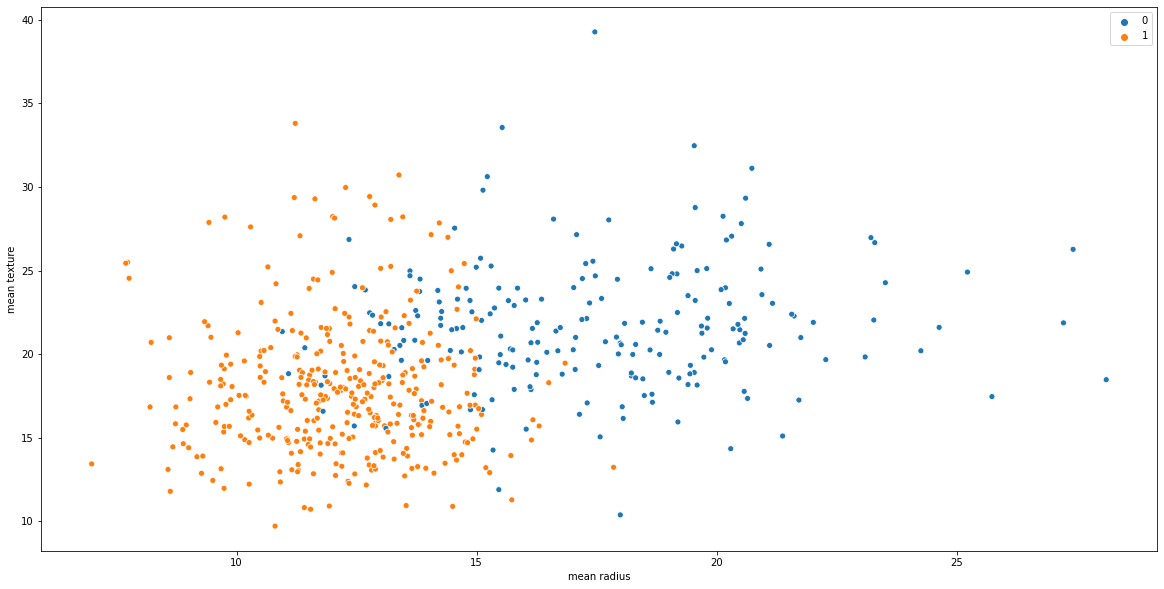

In [157]:
plt.figure(figsize = (20,10))

sns.scatterplot(x=X['mean radius'], y=X['mean texture'], hue = y)

plt.show()

**Q9**. Call `train_test_split` function in order to create X_train and X_test variables. Use a test_size ratio of 0.5 and make sure both datasets (train and test) have the same size (or almost).

In [158]:
# TODO : split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

In [160]:
X_train.shape, X_test.shape

((285, 30), (284, 30))

**Q10**. Again, visualize the data in two scatterplot charts. One for the training set and another for the testing set.

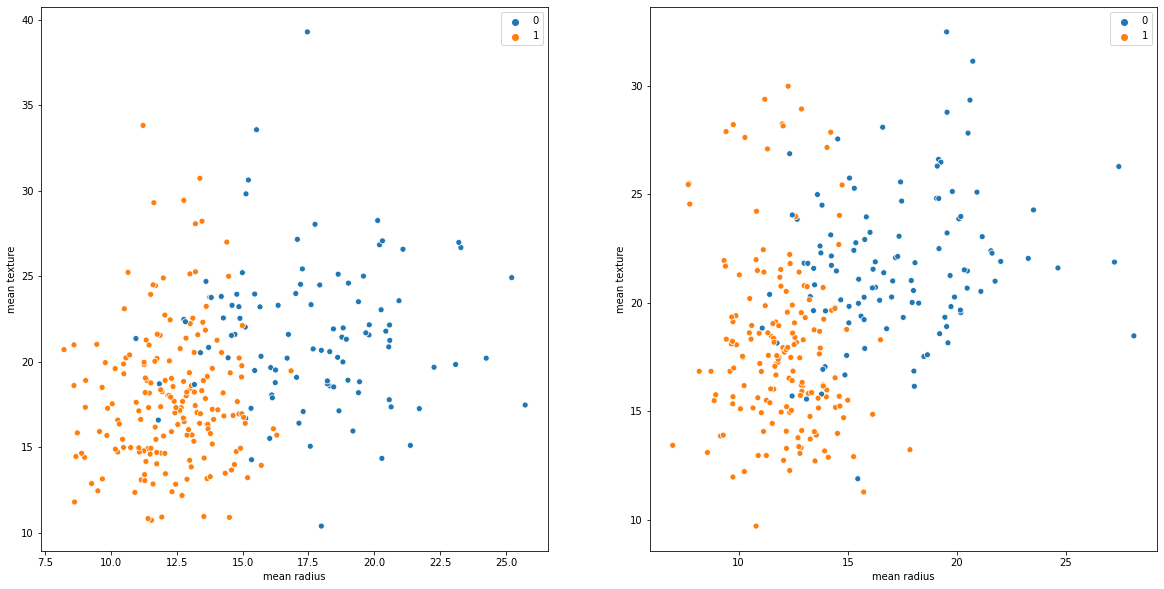

In [161]:
# TODO : data visualization
plt.figure(figsize = (20,10))

plt.subplot(121)
sns.scatterplot(x=X_train['mean radius'], y=X_train['mean texture'], hue = y_train)

plt.subplot(122)
sns.scatterplot(x=X_test['mean radius'], y=X_test['mean texture'], hue = y_test)

plt.show()